In [1]:
def py_arctan_slow(x,n_terms):
    suma=0
    for i in range(1,n_terms+1):
        denominador=2*i-1
        potencia=x**(2*i-1)
        signo=(-1)**(i-1)
        termino=signo*potencia/denominador
        suma+=termino
    return suma

In [2]:
def py_arctan_fast(x,n_terms):
    suma=x
    termino=x
    for i in range(2,n_terms+1):
        termino*=-((2*i-3)/(2*i-1))*x*x
        suma+=termino
    return suma

In [3]:
%%file c_arctan.c

double c_arctan1(double x,int n_terms){
    double suma=x,termino=x;
    for(int i=2;i<=n_terms;termino*=-((2*i-3)/(2.0*i-1))*x*x,suma+=termino,i++);
    return suma;
}

long double c_arctan2(long double x,int n_terms){
    long double suma=x,termino=x;
    for(int i=2;i<=n_terms;termino*=-((2*i-3)/(2.0*i-1))*x*x,suma+=termino,i++);
    return suma;
}

Overwriting c_arctan.c


In [4]:
!gcc -c c_arctan.c

In [5]:
!gcc -shared c_arctan.o -o c_arctan.so

In [6]:
import ctypes

In [7]:
def ctypes_c_arctan():
    ola=ctypes.CDLL('./c_arctan.so')
    ola.c_arctan1.argtypes=[ctypes.c_double,ctypes.c_int]
    ola.c_arctan2.argtypes=[ctypes.c_longdouble,ctypes.c_int]
    ola.c_arctan1.restype=ctypes.c_double
    ola.c_arctan2.restype=ctypes.c_longdouble
    return ola.c_arctan1,ola.c_arctan2

In [8]:
c_arctan_double,c_arctan_longdouble=ctypes_c_arctan()

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
xs = np.linspace(-1.00, 1.00, 1000)

In [11]:
yslow = np.asarray([py_arctan_slow(x, 1) for x in xs])
yfast = np.asarray([py_arctan_fast(x, 1) for x in xs])
yfast_cd = np.asarray([c_arctan_double(x, 1) for x in xs])
yfast_cld = np.asarray([c_arctan_longdouble(x, 1) for x in xs])

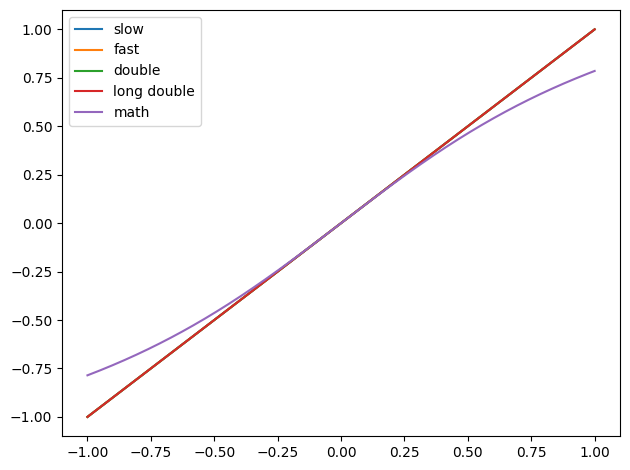

In [12]:
plt.plot(xs,yslow, label='slow')
plt.plot(xs,yfast, label='fast')
plt.plot(xs,yfast_cd, label='double')
plt.plot(xs,yfast_cld, label='long double')
plt.plot(xs,np.arctan(xs), label='math')
plt.legend()
plt.tight_layout()

In [13]:
def error_relativo(f,xs,n_terms):
    return abs(np.linalg.norm(np.asarray([f(x,n_terms) for x in xs]))-np.linalg.norm(np.asarray([np.arctan(x) for x in xs])))/np.linalg.norm(np.asarray([np.arctan(xs) for x in xs]))

In [14]:
N = 200
err_slow = [error_relativo(py_arctan_slow, xs, n) for n in range(10, N, 10)]
err_fast = [error_relativo(py_arctan_fast, xs, n) for n in range(10, N, 10)]
err_cd = [error_relativo(c_arctan_double, xs, n) for n in range(10, N, 10)]
err_cld = [error_relativo(c_arctan_longdouble, xs, n) for n in range(10, N, 10)]

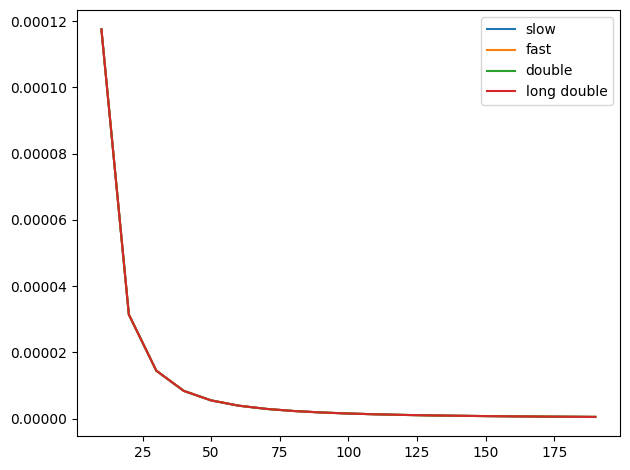

In [15]:
plt.plot(range(10, N, 10), err_slow, label='slow')
plt.plot(range(10, N, 10), err_fast, label='fast')
plt.plot(range(10, N, 10), err_cd, label='double')
plt.plot(range(10, N, 10), err_cld, label='long double')
plt.legend()
plt.tight_layout()

In [16]:
def arctan(f, n_terms, xs):
    return np.asarray([f(x, n_terms) for x in xs])

In [17]:
import time

In [18]:
t_py_slow = []
t_py_fast = []
t_c_double = []
t_c_longdouble = []
xs = np.linspace(-1.00, 1.00, 1000)
Ns = range(10, N, 10)

for n in Ns:
    t_py_slowi = []
    t_py_fasti = []
    t_c_doublei = []
    t_c_longdoublei = []    
    for _ in range(20):
        tic = time.perf_counter()
        arctan(py_arctan_slow, n, xs)
        toc = time.perf_counter()
        t_py_slowi.append(toc-tic)
        tic = time.perf_counter()
        arctan(py_arctan_fast, n, xs)
        toc = time.perf_counter()
        t_py_fasti.append(toc-tic)
        tic = time.perf_counter()
        arctan(c_arctan_double, n, xs)
        toc = time.perf_counter()
        t_c_doublei.append(toc-tic)
        tic = time.perf_counter()
        arctan(c_arctan_double, n, xs)
        toc = time.perf_counter()
        t_c_longdoublei.append(toc-tic)
    t_py_slow.append(np.median(t_py_slowi))
    t_py_fast.append(np.median(t_py_fasti))
    t_c_double.append(np.median(t_c_doublei))
    t_c_longdouble.append(np.median(t_c_longdoublei))

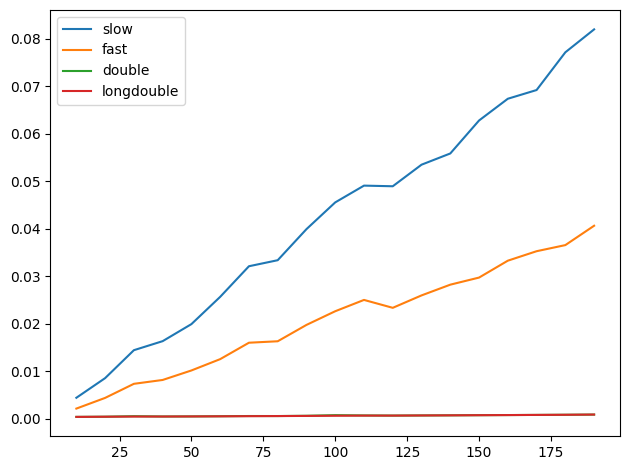

In [19]:
plt.plot(Ns, t_py_slow, label='slow')
plt.plot(Ns, t_py_fast, label='fast')
plt.plot(Ns, t_c_double, label='double')
plt.plot(Ns, t_c_longdouble, label='longdouble')
plt.legend()
plt.tight_layout()

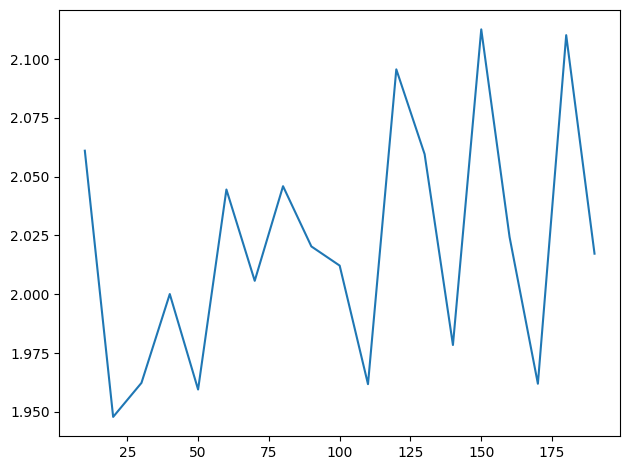

In [20]:
plt.plot(Ns, np.asarray(t_py_slow) / np.asarray(t_py_fast), label='fast')
plt.tight_layout()

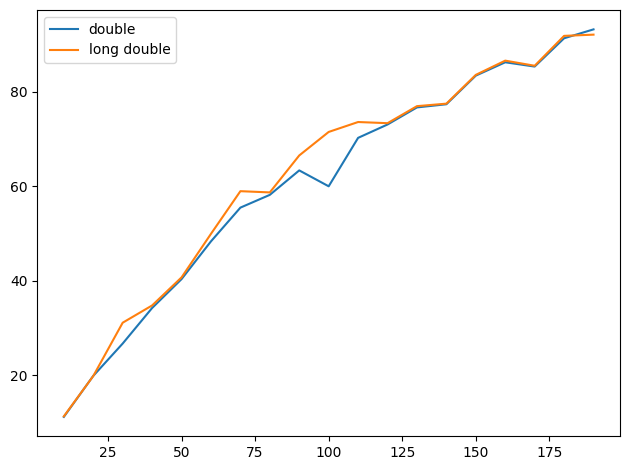

In [21]:
plt.plot(Ns, np.asarray(t_py_slow) / np.asarray(t_c_double), label='double')
plt.plot(Ns, np.asarray(t_py_slow) / np.asarray(t_c_longdouble), label='long double')
plt.legend()
plt.tight_layout()